### Import libraries

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift, estimate_bandwidth

### Read data and preprocessing

In [84]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [85]:
df.shape

(200, 5)

In [86]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [87]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [88]:
df.rename(index = str, columns = {'Annual Income (k$)':'Income',
                                  'Spending Score (1-100)':'Score'}, inplace = True)

In [89]:
df.head()

,CustomerID,Gender,Age,Income,Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


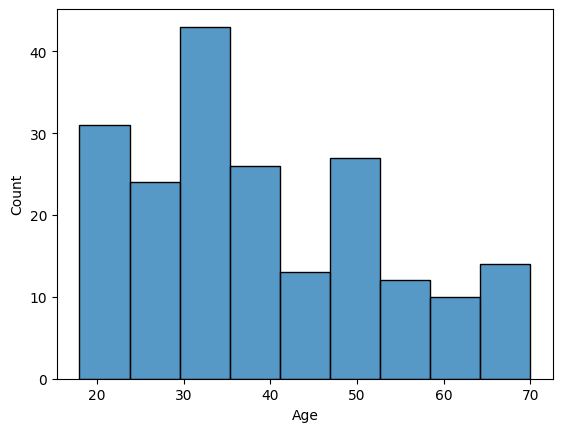

In [90]:
sns.histplot(data = df['Age']);

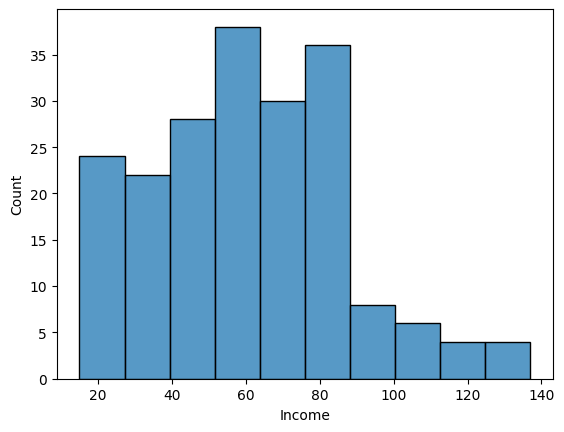

In [91]:
sns.histplot(data = df['Income']);


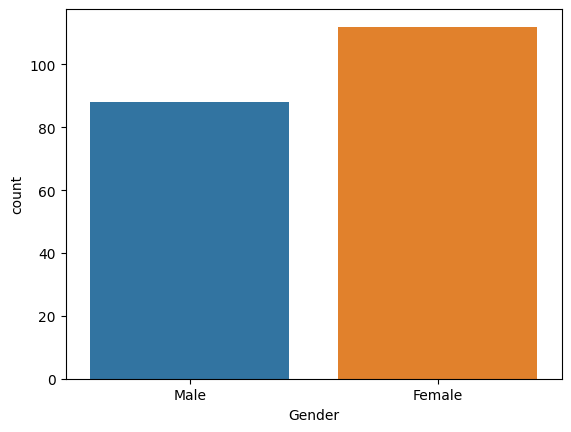

In [92]:
sns.countplot(x = df['Gender']);

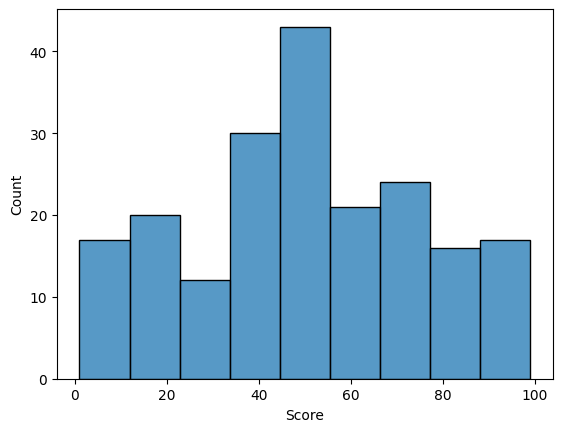

In [93]:
sns.histplot (x = df['Score']);

It is obvious that the data in features [Age, Score, Income] are not normally distributed, while that in feature gender are not fairly divided

#### Encode column Gender

In [94]:
label_encoder = LabelEncoder()

df['Gender'] = label_encoder.fit_transform(df['Gender'])
df

,CustomerID,Gender,Age,Income,Score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


In [95]:
df = df.drop(columns = 'CustomerID', axis = 1)

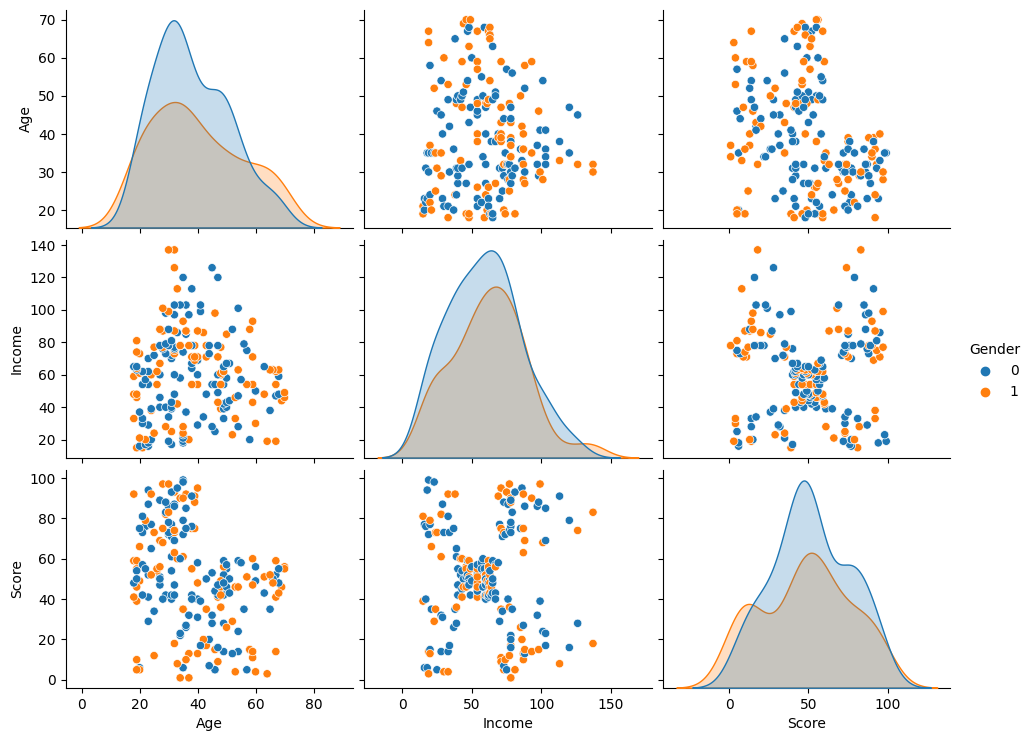

In [96]:
sns.pairplot (df, hue = 'Gender', aspect= 1.3);

Insight: the gender does not have any effects on customer clustering. Thus, it could be dropped

In [97]:
df.head()

,Gender,Age,Income,Score
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


### Set up train set and Train model

In [98]:
X = df.drop('Gender', axis =1)

#### Train model with K_means

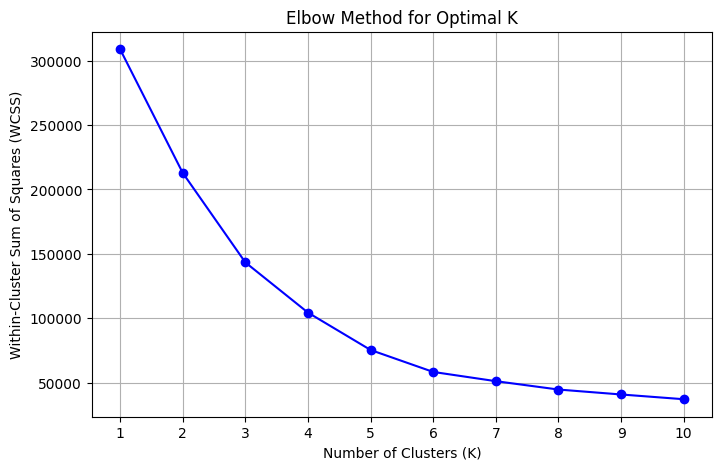

In [99]:
k_values = range(1, 11)
wcss = [] 
# calculate inertia
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_) 

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_values, wcss, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(k_values)
plt.grid(True)
plt.show()

Insight: k = 3, or k = 4 could be the elbow points

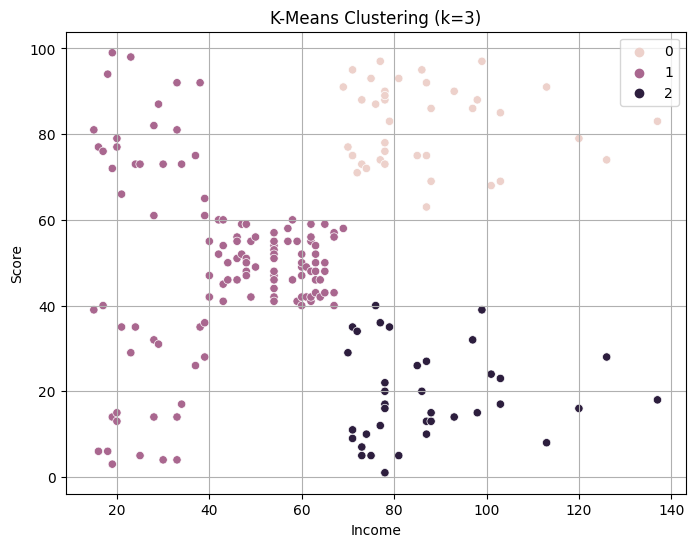

In [101]:
# k = 3
kmeans = KMeans(n_clusters=k, random_state=42).fit(X)
X['Labels'] = kmeans.labels_

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Income', y='Score', hue = X['Labels'])

plt.title('K-Means Clustering (k=3)')
plt.xlabel('Income')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show();

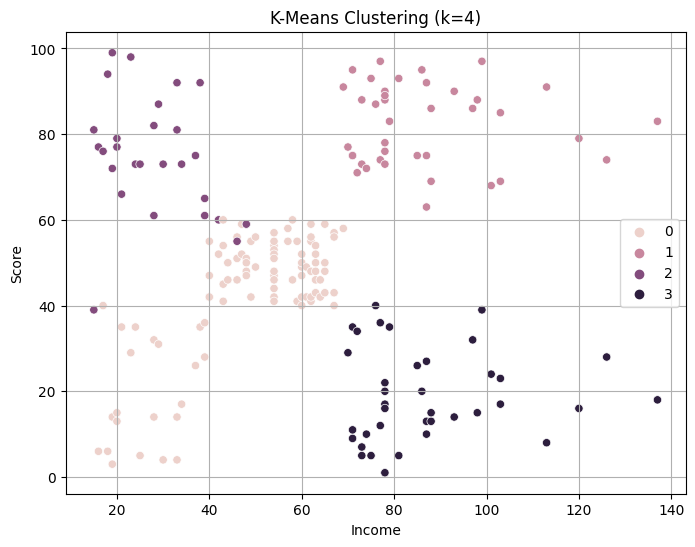

In [103]:
# k = 4
kmeans = KMeans(n_clusters=k, random_state=42).fit(X)
X['Labels'] = kmeans.labels_

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Income', y='Score', hue = X['Labels'])

plt.title('K-Means Clustering (k=4)')
plt.xlabel('Income')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show();

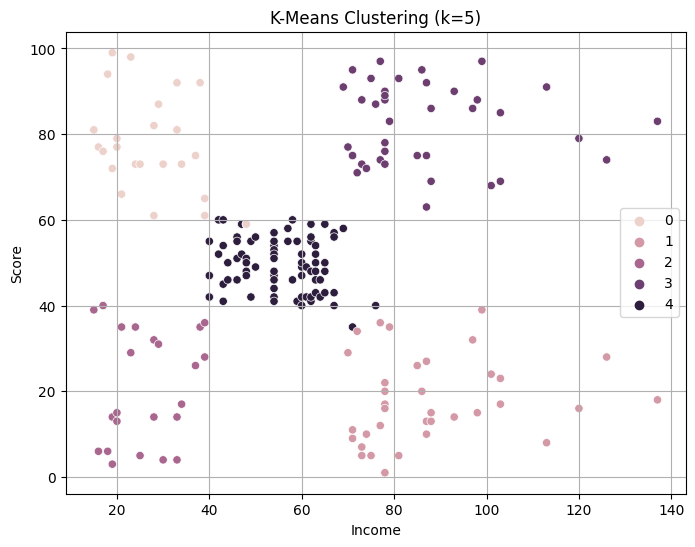

In [104]:
# k = 5
kmeans = KMeans(n_clusters=k, random_state=42).fit(X)
X['Labels'] = kmeans.labels_

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Income', y='Score', hue = X['Labels'])

plt.title('K-Means Clustering (k=5)')
plt.xlabel('Income')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show();

Insight: At k = 5, the segmentation seems to be rational with customers are divided into 5 groups based on their spending and income

#### Train model with Hierarchical Agglomerative Clustering (HAC)

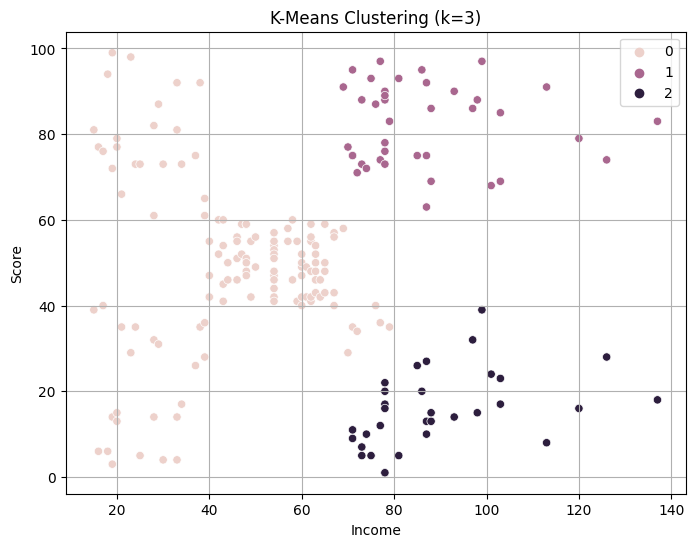

In [105]:
k = 3
agg = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward').fit(X)
X['Labels'] = agg.labels_

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Income', y='Score', hue = X['Labels'])

plt.title('K-Means Clustering (k=3)')
plt.xlabel('Income')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show();

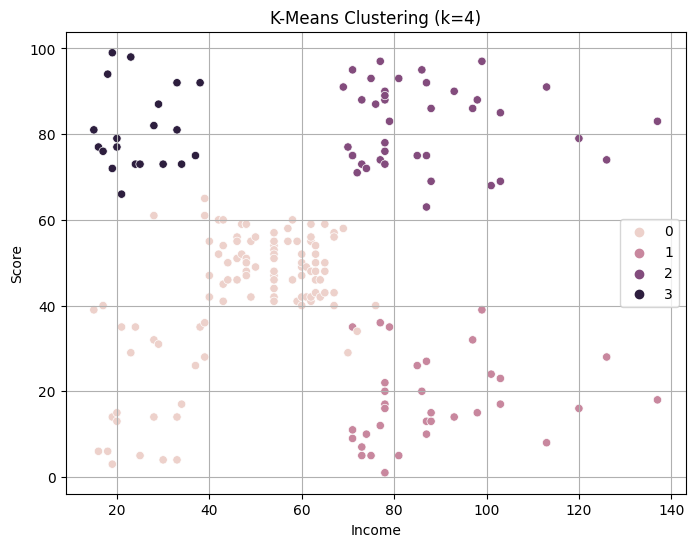

In [106]:
k = 4
agg = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward').fit(X)
X['Labels'] = agg.labels_

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Income', y='Score', hue = X['Labels'])

plt.title('K-Means Clustering (k=4)')
plt.xlabel('Income')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show();

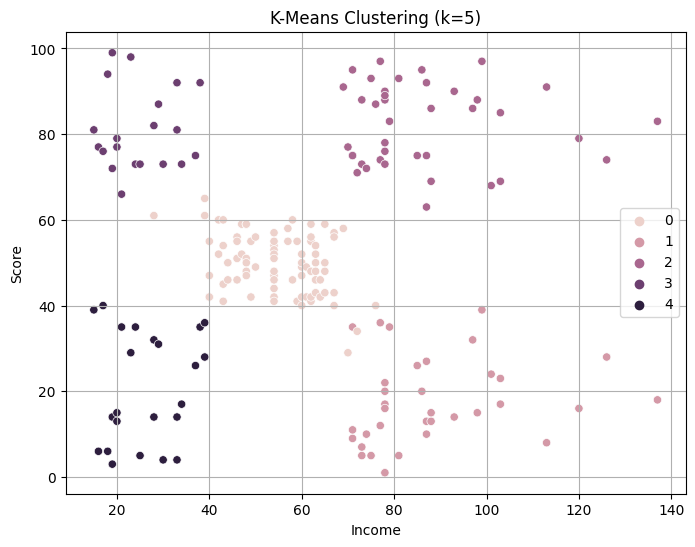

In [107]:
k = 5
agg = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward').fit(X)
X['Labels'] = agg.labels_
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Income', y='Score', hue = X['Labels'])
plt.title('K-Means Clustering (k=5)')
plt.xlabel('Income')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show();

Hierarchical Clustering Agglomerative gave the same result as Kmeans did

#### Train model with Mean shift

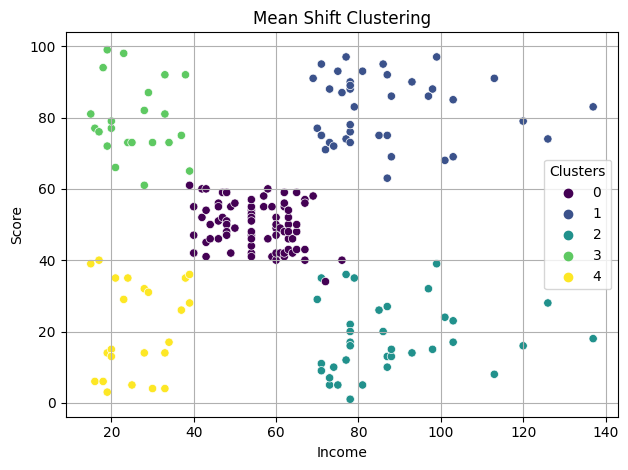

In [108]:

bandwidth = estimate_bandwidth(X, quantile=0.1)
ms = MeanShift(bandwidth = bandwidth).fit(X)
X['Meanshift_Labels'] = ms.labels_

sns.scatterplot(data=df, x='Income', y='Score', hue=X['Meanshift_Labels'], palette='viridis')
plt.title('Mean Shift Clustering')
plt.xlabel('Income')
plt.ylabel('Score')
plt.legend(title='Clusters')
plt.grid(True)
plt.tight_layout()
plt.show()

### Conclusion

##### All of the algorithms used in this notebook return exactly the same results
##### Pros: 
+ Easy to understand and implement (and debug)
+ Highly reasonable results that helps the customer segmentation easier and more understandable
+ Consistently identified similar clusters in the dataset, which suggests the presence of meaningful groupings in the data.  
##### Cons: 
+ All three algorithms (K-Means, HAC, and Mean Shift) require parameter tuning
+ Some clustering algorithms may not scale well to very large datasets, impacting their efficiency and effectiveness
+ Hierarchical Agglomerative Clustering (HAC) and Mean Shift can be computationally expensive, particularly for large datasets

### Thank you reading the whole notebook, if something is wrong, please give me constructive feedbacks.

## THE END